# Importing Libraries

In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from datasist.structdata import detect_outliers

## Read Dataset

In [2]:
df=pd.read_csv("cars_for_sale(uncleaned).csv") #importing data from CSV sheet
df.sample(5) #showing 5 sample of my data

,Car,Condition,Mileage,Price,Basics Info,Vehicle History Info,Vehicle Reviews Info,Seller Rating,Seller Rating Count,Seller Address
1216,2021 INFINITI QX80 SENSORY AWD,Used,"56,250 mi.","$39,972","{'Exterior color': ' Black Obsidian ', 'Interi...",{'Accidents or damage': 'At least 1 accident o...,"{'Comfort': '4.0', 'Interior': '3.0', 'Perform...",4.7,"(3,410 reviews)","5240 Golf Road Skokie, IL 60077"
8879,2024 Hyundai Santa Fe Limited,New,8 mi.,"$47,015MSRP $47,015",{'Exterior color': ' Shimmering Silver Pearl '...,{},"{'Comfort': '5.0', 'Interior': '5.0', 'Perform...",4.2,"(3,030 reviews)","6750 W Grand Ave Chicago, IL 60707"
7414,2023 Nissan Murano SV,Used,"10,096 mi.","$31,552$152 price drop","{'Exterior color': ' Boulder Gray Pearl ', 'In...","{'Accidents or damage': 'None reported', 'Clea...","{'Comfort': '5.0', 'Interior': '5.0', 'Perform...",4.7,"(2,143 reviews)","1075 W Golf Road Hoffman Estates, IL 60169"
5633,2024 Subaru Forester Sport,New,5 mi.,"$33,304","{'Exterior color': ' Crystal White Pearl ', 'I...",{},"{'Comfort': '5.0', 'Interior': '5.0', 'Perform...",NaN,NaN,"1350 Park Ave W Highland Park, IL 60035"
6473,NaN,NaN,NaN,NaN,{},{},{},NaN,NaN,NaN


In [3]:
df.info() #shows basic details about the columns and data types in my dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9246 entries, 0 to 9245
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Car                   9071 non-null   object 
 1   Condition             9071 non-null   object 
 2   Mileage               9071 non-null   object 
 3   Price                 9071 non-null   object 
 4   Basics Info           9242 non-null   object 
 5   Vehicle History Info  9242 non-null   object 
 6   Vehicle Reviews Info  9242 non-null   object 
 7   Seller Rating         7716 non-null   float64
 8   Seller Rating Count   7716 non-null   object 
 9   Seller Address        8954 non-null   object 
dtypes: float64(1), object(9)
memory usage: 722.5+ KB


In [4]:
df.columns= df.columns.str.lower().str.strip() # making all column names lowercase and removing extra spaces 
df.columns= df.columns.str.replace(' ', '_')  # replacing spaces in column names with underscores  

## data understanding

In [5]:
df.shape #getting the number of rows and columns

(9246, 10)

In [6]:
df.info() #shows basic details about the columns and data types in my dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9246 entries, 0 to 9245
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   car                   9071 non-null   object 
 1   condition             9071 non-null   object 
 2   mileage               9071 non-null   object 
 3   price                 9071 non-null   object 
 4   basics_info           9242 non-null   object 
 5   vehicle_history_info  9242 non-null   object 
 6   vehicle_reviews_info  9242 non-null   object 
 7   seller_rating         7716 non-null   float64
 8   seller_rating_count   7716 non-null   object 
 9   seller_address        8954 non-null   object 
dtypes: float64(1), object(9)
memory usage: 722.5+ KB


In [7]:
df.isnull().sum() #representing the sum numbers of the null values

car                      175
condition                175
mileage                  175
price                    175
basics_info                4
vehicle_history_info       4
vehicle_reviews_info       4
seller_rating           1530
seller_rating_count     1530
seller_address           292
dtype: int64

In [8]:
df.isnull().mean()*100 #representing the mean of the null values

car                      1.892710
condition                1.892710
mileage                  1.892710
price                    1.892710
basics_info              0.043262
vehicle_history_info     0.043262
vehicle_reviews_info     0.043262
seller_rating           16.547696
seller_rating_count     16.547696
seller_address           3.158122
dtype: float64

In [9]:
df.drop(["vehicle_reviews_info","seller_rating", "seller_rating_count"], axis=1, inplace=True) # droping unnecessary columns

In [10]:
df = df.dropna() # Droping null values

# Data Cleaning column by column

### seller_address

In [11]:
df['seller_address'].unique() # shows all unique values in the 'seller_address' column

array(['1250 W Division St Chicago, IL 60642',
       '1301 N Elston Ave Chicago, IL 60642',
       '1561 N Fremont St Chicago, IL 60642',
       '560 E North Ave West Chicago, IL 60185',
       '6539 Ogden Ave Berwyn, IL 60402',
       '6750 W Grand Ave Chicago, IL 60707',
       '7158 Harlem Ave Bridgeview, IL 60455',
       '6007 S Archer Rd Summit, IL 60501',
       '1210 25th Ave Melrose Park, IL 60160',
       '6400 Harlem Ave Summit, IL 60501',
       '5050 Dempster Street Skokie, IL 60077',
       '6750 West 95th Street Oak Lawn, IL 60453',
       '241 Waukegan Rd Glenview, IL 60025',
       '11201 S Harlem Ave Worth, IL 60482',
       '530 W Grand Ave Elmhurst, IL 60126',
       '400 E Roosevelt Rd Villa Park, IL 60181',
       '594 W Lake St Elmhurst, IL 60126',
       '12717 Cal Sag Rd Crestwood, IL 60445',
       '13840 South Pulaski Road Crestwood, IL 60445',
       '500 E. Ogden Ave. Westmont, IL 60559',
       '1326 West Irving Park Road Bensenville, IL 60106',
       '5

In [12]:
df['state'] = df['seller_address'].apply(lambda x: x.split()[-2]) # extracts the state name from the seller_address column  
df['state'].value_counts() # shows how many cars are listed in each state  

state
IL    8610
IN     344
Name: count, dtype: int64

In [13]:
# Mapping dictionary
state_map = {'IL': 'Illinois','IN': 'Indiana'}  # creating a mapping dictionary for state codes 

df['state'] = df['state'].map(state_map)   # replacing state codes with full state names  

In [14]:
df.drop(["seller_address"], axis=1, inplace=True) # droping unnecessary column

In [15]:
df.isnull().sum() # showing the number of missing values in each column 

car                     0
condition               0
mileage                 0
price                   0
basics_info             0
vehicle_history_info    0
state                   0
dtype: int64

In [16]:
df.isnull().mean()*100 # showing the percentage of missing values in each column 

car                     0.0
condition               0.0
mileage                 0.0
price                   0.0
basics_info             0.0
vehicle_history_info    0.0
state                   0.0
dtype: float64

### Condition

In [17]:
df['condition'].value_counts() # showing how many condition categories of cars

condition
Used                       4888
New                        3549
Chevrolet Certified          71
Mercedes-Benz Certified      49
Ford Certified               37
BMW Certified                35
Porsche Certified            33
Audi Certified               30
Subaru Certified             27
Jeep Certified               25
Nissan Certified             23
Volkswagen Certified         22
GMC Certified                18
Buick Certified              17
Ferrari Certified            17
Cadillac Certified           15
Lincoln Certified            11
Certified                    10
Honda Certified              10
Dodge Certified               9
INFINITI Certified            8
Hyundai Certified             7
Chrysler Certified            7
RAM Certified                 7
Acura Certified               6
Rolls-Royce Certified         6
Genesis Certified             5
Volvo Certified               4
Kia Certified                 4
Maserati Certified            2
Aston Martin Certified        

In [18]:
## Example of Feature Engineering

def group_conditions(condition):  # function to group different condition labels into 'New', 'Used', or 'CPO'
    if condition == 'New':
        return 'New'
    elif condition == 'Used':
        return 'Used'
    else:
        return 'Certified Pre-Owned (CPO)'

df['condition'] = df['condition'].apply(group_conditions) # grouping condition values into 3 categories: New, Used, and CPO  

In [19]:
df['condition'].value_counts() # showing how many condition categories of cars

condition
Used                         4888
New                          3549
Certified Pre-Owned (CPO)     517
Name: count, dtype: int64

### Car

In [20]:
df['car'].unique()  # showing all unique car names in the 'car' column

array(['2024 Lexus LC 500 Base', '2007 Acura TSX Base',
       '2016 McLaren 675LT Base', ...,
       '2024 Alfa Romeo Tonale Veloce EAWD',
       '2021 Audi SQ5 3.0T Prestige', '2024 GMC Sierra 1500 Pro'],
      shape=(3394,), dtype=object)

In [21]:
# Example of feature engineering

df["model_year"] = df["car"].apply(lambda x:x.split(' ')[0]) # extracting the model year from the 'car' column

In [22]:
df["model_year"].unique() # Shows all unique values in the 'model_year' column after doing feature enginering 

array(['2024', '2007', '2016', '2018', '2019', '2012', '2008', '2013',
       '2020', '2014', '2015', '2004', '2000', '2011', '1988', '2002',
       '2023', '2006', '1975', '2009', '2005', '2017', '2010', '2022',
       '2021', '2003', '1983', '1981', '2001', '1993', '1971', '1985',
       '1980', '1974', '1999', '1989', '1972', '1994', '1992', '1991',
       '1984', '1976', '1995', '2025', '1998', '1997', '1990', '1970',
       '1996', '1982', '1960', '1959', '1973', '1987', '1969', '1966'],
      dtype=object)

In [23]:
# Example of  Feature Transformation

df['model_year'] = pd.to_datetime(df['model_year'], format='%Y').dt.year # converting model year to datetime and extracting the year

In [24]:
# Example of feature engineering

df['car_age']= datetime.now().year - df['model_year'] # calculating car age by subtracting model year from current year

### Manufacturer

In [25]:
# Example of feature engineering

df["manufacturer"] = df["car"].str.split().str[1] # extracting manufacturer name from the second word from the 'car' column

In [26]:
df["manufacturer"].value_counts()  # showing the count of each unique manufacturer

manufacturer
Ford             842
Jeep             809
Chevrolet        791
Nissan           596
BMW              457
Mercedes-Benz    445
Subaru           427
Honda            378
Toyota           359
Audi             315
Cadillac         312
Lexus            287
Volkswagen       284
Kia              279
RAM              229
INFINITI         203
Hyundai          193
Dodge            145
Tesla            141
Lincoln          137
Volvo            116
GMC              115
Mazda            107
Chrysler         103
Buick            101
Porsche           99
Acura             95
Jaguar            63
Land              54
Mitsubishi        52
Ferrari           45
Genesis           43
Maserati          41
MINI              41
Alfa              31
Scion             29
Aston             25
Rivian            24
Rolls-Royce       23
Lamborghini       21
Pontiac           14
Bentley           13
Saab              13
Saturn            10
McLaren            8
Polestar           8
Hummer             7


### mileage

In [27]:
df['mileage'].unique() # showing all unique mileage values

array([' 0 mi.', ' 61,110 mi.', ' 6,305 mi.', ..., ' 3,246 mi.',
       ' 40,291 mi.', ' 79,767 mi.'], shape=(3909,), dtype=object)

In [28]:
df['mileage'] = df['mileage'].str.replace(' mi.', '', regex=False).str.strip().str.replace(',', '') # cleaning mileage column by removing 'mi.' and commas

In [29]:
df['mileage'] = df['mileage'].replace('', np.nan) # replacing empty strings in mileage column with NaN (missing values)

In [30]:
df.rename(columns= {'mileage': 'mileage_mi'}, inplace= True) #renamed the column

### price

In [31]:
df['price'].value_counts() # shows how many times each price appears

price
$9,995                    34
$19,995                   30
$12,995                   27
$15,995                   26
$19,998                   26
                          ..
$30,952$636 price drop     1
$41,795$600 price drop     1
$45,179MSRP $56,640        1
$19,842$837 price drop     1
$39,960                    1
Name: count, Length: 5136, dtype: int64

In [32]:
df['price'] = df['price'].str.split('$').str[1].str.replace(r'[a-zA-Z]', '', regex=True).str.strip().str.replace(',', '') # Cleaning 'price' column: removes '$', letters, extra spaces, and commas

In [33]:
df['price'].value_counts() # Shows how many times each unique price appears in the 'price' column

price
19995    39
9995     35
12995    32
16995    32
19998    31
         ..
23364     1
62325     1
55761     1
27528     1
22650     1
Name: count, Length: 4420, dtype: int64

In [34]:
df["price"] = df["price"].str.split().str[0] # Keeps only the first part of the 'price' (before any spaces)

In [35]:
df['price'].value_counts() # Shows how many times each unique price appears in the 'price' column

price
19995    39
9995     35
16995    32
12995    32
19998    31
         ..
29410     1
79639     1
57331     1
9982      1
40995     1
Name: count, Length: 4411, dtype: int64

In [36]:
df.isnull().sum() # Shows the total number of missing (NaN) values in each column

car                       0
condition                 0
mileage_mi              150
price                    17
basics_info               0
vehicle_history_info      0
state                     0
model_year                0
car_age                   0
manufacturer              0
dtype: int64

In [37]:
df = df.dropna() #droping the null values

In [38]:
# Example of Feature Transformation

# Changing the data type of price and mileage to integer
df['price'] = pd.to_numeric(df['price'], errors='coerce')
df['mileage_mi'] = pd.to_numeric(df['mileage_mi'], errors='coerce')

In [39]:
df.info()  # Provides a  summary of the DataFrame, including column names, data types, and non-null counts

<class 'pandas.core.frame.DataFrame'>
Index: 8787 entries, 0 to 9245
Data columns (total 10 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   car                   8787 non-null   object
 1   condition             8787 non-null   object
 2   mileage_mi            8787 non-null   int64 
 3   price                 8787 non-null   int64 
 4   basics_info           8787 non-null   object
 5   vehicle_history_info  8787 non-null   object
 6   state                 8787 non-null   object
 7   model_year            8787 non-null   int32 
 8   car_age               8787 non-null   int32 
 9   manufacturer          8787 non-null   object
dtypes: int32(2), int64(2), object(6)
memory usage: 686.5+ KB


### basics_info

In [40]:
df["basics_info"].unique # Returns the unique values in the 'basics_info' column

<bound method Series.unique of 0       {'Exterior color': ' Caviar ', 'Interior color...
1       {'Exterior color': ' Alabaster Silver Metallic...
2       {'Exterior color': ' McLaren Orange ', 'Interi...
3       {'Exterior color': ' Black ', 'Interior color'...
4       {'Exterior color': ' Imperial Blue Metallic ',...
                              ...                        
9240    {'Exterior color': ' Bright White Clearcoat ',...
9242    {'Exterior color': ' Dark Graphite Metallic ',...
9243    {'Exterior color': ' Summit White ', 'Interior...
9244    {'Exterior color': ' Black ', 'Interior color'...
9245    {'Exterior color': ' Magnetite Gray Metallic '...
Name: basics_info, Length: 8787, dtype: object>

In [41]:
# Example of feature engineering

df["basics_info"] = df["basics_info"].apply(eval) # Convert the string dictionaries into actual dictionaries

df['fuel_type'] = df['basics_info'].apply(lambda x: x.get('Fuel type', 'Unknow').strip()) # Extracts 'Fuel type' value from each dict
df['drivetrain'] = df['basics_info'].apply(lambda x: x.get('Drivetrain', 'Unknow').strip()) # Extracts 'Drivetrain' value from each dict
df['transmission'] = df['basics_info'].apply(lambda x: x.get('Transmission', 'Unknow').strip()) # Extracts 'Transmission' value from each dict
df['exterior_color'] = df['basics_info'].apply(lambda x: x.get('Exterior color', 'Unknow').strip()) # Extracts 'Exterior color' value from each dict
df['interior_color'] = df['basics_info'].apply(lambda x: x.get('Interior color', 'Unknow').strip()) # Extracts 'Interior color' value from each dict

### fuel_type

In [42]:
df["fuel_type"].value_counts() # Counts how many times each unique fuel type appears in the 'fuel_type' column

fuel_type
Gasoline            7388
Unknow               564
Hybrid               424
Diesel               259
E85 Flex Fuel        116
–                     32
Gas/Electric Hyb       2
Flexible Fuel          2
Name: count, dtype: int64

In [43]:
# used to group various fuel types into categories

fuel_group_map = {
    'Gasoline': 'Gasoline',
    'Hybrid': 'Hybrid',
    'Diesel': 'Diesel',
    'E85 Flex Fuel': 'Flex Fuel',
    'Plug-In Hybrid': 'Hybrid',   
    'Gas/Electric Hyb': 'Hybrid',       
    'Flexible Fuel': 'Flex Fuel',         
    'Unknow': np.nan,
    '–': np.nan,
}

df['fuel_type'] = df['fuel_type'].map(fuel_group_map) # Groups similar fuel types and replaces unknown/missing values with NaN

In [44]:
df["fuel_type"].value_counts() # Counts how many times each unique fuel type appears in the 'fuel_type' column

fuel_type
Gasoline     7388
Hybrid        426
Diesel        259
Flex Fuel     118
Name: count, dtype: int64

### drivetrain

In [45]:
df["drivetrain"].value_counts() # Counts how many times each unique drivetrain type appears in the 'drivetrain' column

drivetrain
All-wheel Drive      3891
Front-wheel Drive    1950
Four-wheel Drive     1752
Rear-wheel Drive      999
AWD                    68
–                      45
RWD                    26
FWD                    24
Unknown                23
4WD                     9
Name: count, dtype: int64

All-wheel Drive: Power to all four wheels, good for slippery roads.
Front-wheel Drive: Power to the front two wheels, efficient for daily use.	
Four-wheel Drive: Power to all wheels when needed, great for off-road driving.	
Rear-wheel Drive: Power to the rear two wheels, ideal for speed and performance.	
AWD: Same as "All-wheel Drive," just written differently.	
RWD: Same as "Rear-wheel Drive," just written differently.	
FWD: Same as "Front-wheel Drive," just written differently.	
4WD: Same as "Four-wheel Drive," just written differently.	

In [46]:
# Example of Feature Engineering.

# used to group various drivetrain into categories

drivetrain_mapping = {
    'All-wheel Drive': 'All-wheel Drive',
    'AWD': 'All-wheel Drive',
    'Four-wheel Drive': 'Four-wheel Drive',
    '4WD': 'Four-wheel Drive',
    'Rear-wheel Drive': 'Rear-wheel Drive',
    'RWD': 'Rear-wheel Drive',
    'Front-wheel Drive': 'Front-wheel Drive',
    'FWD': 'Front-wheel Drive',
    'Unknown': np.nan,
    '–': np.nan,
}

df['drivetrain'] = df['drivetrain'].map(drivetrain_mapping) # Groups similar drivetrain values and replaces unknown/missing ones with NaN

In [47]:
df["drivetrain"].value_counts() # Counts how many times each unique drivetrain type appears in the 'drivetrain' column

drivetrain
All-wheel Drive      3959
Front-wheel Drive    1974
Four-wheel Drive     1761
Rear-wheel Drive     1025
Name: count, dtype: int64

### transmission

In [48]:
df['transmission'].value_counts() # Counts how many times each unique transmission type appears in the 'transmission' column

transmission
Automatic                     2196
8-Speed Automatic             1543
Automatic CVT                 1093
6-Speed Automatic              749
9-Speed Automatic              601
                              ... 
Auto, 6-Spd DSG Tptrnc SM        1
5-Speed                          1
7-Speed F1 Dual-clutch           1
Auto, 6-Spd Adaptive             1
Automatic, 9-Spd 9G-Tronic       1
Name: count, Length: 137, dtype: int64

In [49]:
# used to group various transmission into categories
# Feature Engineering.

transmission_group_map = {
    "Fully Automatic": [
            "Automatic", "A", "3-Speed Automatic", "4-Speed Automatic", "5-Speed Automatic", "6-Speed Automatic",
            "7-Speed Automatic", "8-Speed Automatic", "9-Speed Automatic", "10-Speed Automatic",
            "Automatic CVT", "7G-TRONIC 7-Speed Automatic", "ZF 8-Speed Automatic",
            "10-Speed Automatic with Overdrive", "7-Speed Automatic with Auto-Shift", "8-Speed Automatic with Auto-Shift", 
            "A/T", "Automatic 6-Speed", "Automatic 4-Speed", "Automatic 5-Speed", "9-Speed 948TE Automatic", 
            "Automatic 8-Speed", "Automatic 7-Speed", "Automatic 3-Speed", "9-Speed Automatic with Overdrive", "Automatic 9-Speed", "2-Speed Automatic",
            "8-Speed A/T", "6-Speed Automatic Electronic with Overdrive", "6-Speed A/T", "4-Speed A/T", "6-Speed Automatic Paddle Shift", 
            "6-Speed Automatic with Sportmatic", "Automatic, 6-Spd", "Automatic, 5-Spd w/Overdrive", "Automatic, 5-Spd w/Overdrive & SportShift", 
            "Auto, 8-Spd w/OD", "5-Speed A/T", "Automatic, 4-Spd w/Overdrive", "Automatic, CVT w/Overdrive", "Automatic, 6-Spd w/Overdrive & CommandShift",
            "TorqShift 6-Speed Automatic", "Allison 1000 6-Speed Automatic", "Automatic, 8-Spd", "6 Speed Automatic Transmission", 
            "7-Speed A/T", "Automatic, 9-Spd 9G-Tronic", "5-Speed Automatic with Overdrive", "8-Speed Touchtronic III Automatic", "6-Speed Automatic Touchtonic 2",
            "6-Speed Automatic with TapShift", "Auto 6-Spd w/OD & MM", "7-Speed Automatic with Overdrive", "Automatic, 6-Spd w/Overdrive", 
            "8-Speed Automatic with Overdrive", "6-Speed Automatic with Auto-Shift", "Automatic, 8-Spd Sport", "Auto, 8-Spd Sport", 
            "Auto, 6-Spd Adaptive", "7-speed automatic drive-adaptive transmission-inc"
        
        ],
    
        "Continuously Variable Transmission (CVT)": [
            "CVT", "Automatic CVT", "CVT Transmission", "CVT with Xtronic",
            "Continuously Variable", "Continuously Variable (ECVT)", "10-Speed Shiftable CVT", "IVT", "eCVT", "Automatic Xtronic CVT",
            "Shiftronic", "CVT 7-Speed"
        ],
    
        "Semi-Automatic / Dual-Clutch": [
            "7-Speed Double Clutch", "6-Speed Double Clutch", "8-Speed DCT", 
            "7-Speed DSG Automatic with Tiptronic", "7-Speed DSGA? Automatic w/ 4MO", 
            "7-Speed DCT Automatic", "7-Speed Porsche Doppelkupplung (PDK)",
            "8-Speed Porsche Doppelkupplung (PDK)", "Auto 7Spd DblCltch DrvLgc", "Transmission w/Dual Shift Mode", "Auto, 7-Spd Sportshift",
            "9-Speed Double Clutch", "Automatic, 7-Spd w/Dual-Clutch", "7-Speed Manual Dual Clutch", "7-Speed F1 Dual-clutch",
            "6-Speed Automated Manual", "8-Speed Auto-Shift Manual w/OD", "6-Speed Automated Manual", "8-Speed Auto-Shift Manual w/OD",
            "7-Speed Automatic with Manual Shift", "Automatic, 6-Spd w/Overdrive & Manual Mode"
        ],
    
        "Manual Transmission": [
            "Manual", "6-Speed Manual", "7-Speed Manual", "5-Speed Manual", "M",
            "Manual 5-Speed", "Manual 6-Speed", "4-Speed Manual", 
            "7-Speed Manual with Sportshift II", "Manual, 6-Spd", "Manual, 5-Spd", "6-Speed M/T", "5-Speed M/T","6 Speed Manual", "8-Speed Manual",
            "6-Speed", "5-Speed"
        ],
    
        "Single-Speed or Direct Drive": [
            "1-Speed Automatic", "1-Speed A/T", "1-Speed Direct-Drive Automatic",
            "Single-Speed Automatic", "Single-speed transmission", 
            "Single Speed Transmission", "Single-Speed Fixed Gear", "Automatic, 1-Spd"
        ],
    
        "Tiptronic / Shiftable Automatic": [
            "8-Speed Automatic with Tiptronic", "6-Speed Automatic with Tiptronic", "Automatic with Tiptronic", "8-Speed Shiftable Automatic", 
            "9-Speed Shiftable Automatic", "6-Speed Shiftable Automatic", "8-Speed Automatic with SHIFTRONIC", "SHIFTRONIC",
            "8-Speed Shiftable Automatic w/Sport Transmission", "7-Speed Shiftable Automatic", "6-Speed Automatic with Tiptronic", 
            "8-Speed Automatic w/Sequential Shift Mode", "6-Speed Automatic with Shiftronic", "6-Speed Automatic with Select-Shift", 
            "8-Speed Automatic Sport", "7-Speed Shiftable Automatic", "10-Speed Shiftable Automatic", "Automatic, 6-Spd w/Paddle Shift",
            "7-Speed Automatic S tronic", "5-Speed Shiftable Automatic", "8-Speed Tiptronic", "Auto, 8-Spd Seq Sht & Spt", 
            "Auto, 8-Spd Tiptronic Spt", "Auto, 8-Spd & Tiptronic", "Auto, 8-Spd Tiptronic", "Automatic, 8-Spd w/Tiptronic & Sport Mode", 
            "Auto, 6-Spd DSG Tptrnc SM", "6-speed Steptronic automatic transmission w/OD-inc",
            "Automatic with Geartronic", "Auto, 6-Spd OD CmdShft"
        ],
    
        np.nan: [
         "-", "NOT SPECIFIED", "NULL", "Variable", "Not Specified", "quattroa? s tronica?","–"
        ]
    }

def get_transmission_group(transmission): # Function that maps detailed transmission types to groups
    for group, types in transmission_group_map.items(): # Loops through each group and its list of types
        if transmission in types: # If the current transmission matches any type in the list
            return group          # Return the group name
    return transmission   # If no match is found, return the original transmission value

# Apply the mapping function
df['transmission'] = df['transmission'].apply(get_transmission_group) # Applies the transmission grouping to each value in the 'transmission' column

In [50]:
df['transmission'].value_counts() # Counts how many times each unique transmission type appears in the 'transmission' column

transmission
Fully Automatic                             7597
Single-Speed or Direct Drive                 369
Manual Transmission                          334
Tiptronic / Shiftable Automatic              179
Continuously Variable Transmission (CVT)     129
Semi-Automatic / Dual-Clutch                 108
Name: count, dtype: int64

### exterior_color

In [51]:
df['exterior_color'].unique() # Returns all unique values found in the 'exterior_color' column

array(['Caviar', 'Alabaster Silver Metallic', 'McLaren Orange', ...,
       'Elemental Red Pearl', 'Dark Sky Metallic',
       'Mineral Silver Metallic'], shape=(1174,), dtype=object)

In [52]:
df['exterior_color'] = df['exterior_color'].str.strip().str.lower().str.replace(r'\s+', ' ', regex=True) # Cleans 'exterior_color' by trimming spaces, converting to lowercase, and replacing multiple spaces with a single space

In [53]:
# Categorizes car exterior colors into broader color groups based on keywords in the color name
# Example of Feature Engineering

def categorize_color(color):
    if 'black' in color or 'caviar'in color or 'obsidian' in color or 'midnight' in color:
        return 'Black Shades'
    elif 'gray' in color or 'grey' in color or 'silver' in color or 'metallic' in color or 'platinum' in color or 'metal' in color or 'graphite' in color or 'magnetic' in color:
        return 'Grey Shades'
    elif 'red' in color or 'burgundy' in color or 'scarlet ember' in color or 'rosso corsa' in color:
        return 'Red Shades'
    elif 'green' in color:
        return 'Green Shades'
    elif 'blue' in color or 'sky' in color or 'sea' in color or 'blu' in color:
        return 'Blue Shades'
    elif 'green' in color or 'verde' in color:
        return 'Green Shades'
    elif 'white' in color or 'pearl' in color or 'wht' in color or 'snow' in color or 'ice' in color or 'bianco' in color or 'fresh powder' in color:
        return 'White Shades'    
    elif 'gold' in color or 'orange' in color or 'yellow' in color or 'brown' in color or 'beige' in color or 'tan' in color or 'copper' in color:
        return 'Gold/ Brown and Orange Shades'
    else:
        return 'Others'

# Apply the categorization function
df['exterior_color'] = df['exterior_color'].apply(categorize_color) # Applies the 'categorize_color' function to group exterior colors into categories

In [54]:
df['exterior_color'].value_counts() ## Counts how many cars fall into each exterior color category after grouping

exterior_color
Grey Shades                      3357
Black Shades                     2154
White Shades                     1793
Blue Shades                       489
Red Shades                        462
Others                            330
Gold/ Brown and Orange Shades     107
Green Shades                       95
Name: count, dtype: int64

### interior_color

In [55]:
df['interior_color'].value_counts() # Counts how many times each unique interior color appears in the 'interior_color' column

interior_color
Black                            3310
Gray                              603
Jet Black                         488
–                                 452
Ebony                             403
                                 ... 
Jet Black/Gray w/Blue Accents       1
Black/Graphite                      1
Nero w/ Yellow Stitch               1
Rustic Cedar                        1
Rd                                  1
Name: count, Length: 610, dtype: int64

In [56]:
df['interior_color'] = df['interior_color'].str.strip().str.lower().str.replace(r'\s+', ' ', regex=True) # Cleans 'interior_color' by removing extra spaces, converting to lowercase 

In [57]:
# Feature Engineering

def categorize_color(color): # Defines a function to group color names into color categories based on keywords
    color = str(color).lower().strip() # Converts input to lowercase string and removes extra spaces
    
    if (any(keyword in color for keyword in [
        'black', 'jet', 'ebony', 'charcoal', 'carbon', 'obsidian', 'nero', 
        'onyx', 'noir', 'titan', 'midnight', 'blk', 'anthracite', 'space',
        'dark', 'shadow', 'ink', 'raven', 'phantom', 'storm', 'graphite black',
        'monolith', 'vantablack', 'pitch', 'sport', 'prem', 'bucket'  
    ]) or 'black' in color):
        return 'Black Shades'
    
    elif (any(keyword in color for keyword in [
        'gray', 'grey', 'silver', 'graphite', 'slate', 'stone', 'ash',
        'pewter', 'flint', 'steel', 'aluminum', 'platinum', 'mistral',
        'neva', 'lunar', 'chromite', 'galvanized', 'satin', 'alpine',
        'metal', 'iron', 'nickel', 'zinc', 'concrete', 'fossil', 'hoarfrost',
        'diesel', 'titanium', 'quartz', 'smoke', 'cement'
    ]) or 'gray' in color or 'grey' in color):
        return 'Grey and Silver Shades'
    
    elif (any(keyword in color for keyword in [
        'brown', 'beige', 'tan', 'espresso', 'cocoa', 'sand', 'camel',
        'coffee', 'blond', 'mocha', 'desert', 'cognac', 'parchment',
        'auburn', 'java', 'wheat', 'cappuccino', 'saddle', 'truffle',
        'sepia', 'kona', 'caramel', 'macadamia', 'dune', 'pecan', 'shale',
        'taupe', 'biscuit', 'almond', 'bronze', 'clay', 'ginger', 'hazel',
        'khaki', 'linen', 'mushroom', 'nutmeg', 'ochre', 'pueblo', 'sisal',
        'terracotta', 'umber', 'wicker', 'acorn', 'burlap', 'chateau', 'cashmere',
        'leather', 'nappa' 
    ]) or 'brown' in color or 'beige' in color or 'tan' in color):
        return 'Brown and Beige Shades'
    
    elif (any(keyword in color for keyword in [
        'white', 'cream', 'ivory', 'snow', 'alabaster', 'porcelain',
        'frost', 'oyster', 'chalk', 'pearl', 'bone', 'eggshell', 'cotton',
        'diamond', 'lily', 'milk', 'vanilla', 'whisper', 'cirrus', 'cloud',
        'moonstone', 'seashell', 'ultra white', 'crystal white', 'designo' 
    ]) or 'white' in color or 'ivory' in color):
        return 'White Shades'
    
    elif (any(keyword in color for keyword in [
        'red', 'burgundy', 'maroon', 'crimson', 'rosso', 'scarlet',
        'magma', 'rioja', 'ruby', 'bordeaux', 'vermillion', 'cranberry',
        'sakhir', 'circuit', 'tacora', 'arras', 'cherry', 'currant',
        'garnet', 'rosewood', 'rust', 'wine', 'amaranth', 'cardinal',
        'fiona', 'carmine', 'demonic', 'victory', 'adrenaline', 'express'
    ]) or 'red' in color):
        return 'Red Shades'
    
    elif (any(keyword in color for keyword in [
        'blue', 'navy', 'denim', 'indigo', 'santorini', 'sterling',
        'aqua', 'teal', 'cobalt', 'sapphire', 'admiral', 'marine',
        'arctic', 'azure', 'cerulean', 'cornflower', 'duck', 'egyptian',
        'federal', 'glaucous', 'mazarine', 'pacific', 'royal', 'spruce',
        'interlagos', 'blu sterling'
    ]) or 'blue' in color or 'navy' in color):
        return 'Blue Shades'
    
    elif (any(keyword in color for keyword in [
        'green', 'olive', 'forest', 'moss', 'hunter', 'emerald', 'sage',
        'juniper', 'cypress', 'khaki', 'army', 'pine', 'artichoke',
        'avocado', 'celadon', 'fern', 'jade', 'kelly', 'lime', 'mint',
        'peacock', 'pistachio', 'sea', 'shamrock', 'viridian', 'bamboo'
    ]) or 'green' in color or 'olive' in color):
        return 'Green Shades'
    
    elif (any(keyword in color for keyword in [
        'orange', 'yellow', 'amber', 'gold', 'saffron', 'honey', 'mustard',
        'sakhir', 'arancio', 'tangerine', 'marigold', 'apricot', 'blaze',
        'buttercup', 'citrine', 'daffodil', 'flaxen', 'gamboge', 'lemon',
        'maize', 'nugget', 'pumpkin', 'sandy', 'sunflower', 'ochre', 'topaz'
    ]) or 'orange' in color or 'yellow' in color):
        return 'Orange/Yellow Shades'
    
    else:
        return 'Others' # Returns 'Others' if the color does not match any group above
        
df['interior_color'] = df['interior_color'].apply(categorize_color) # Applies the 'categorize_color' function to group interior colors into categories

In [58]:
df['interior_color'].value_counts() # Counts how many cars fall into each interior color category after grouping

interior_color
Black Shades              5995
Grey and Silver Shades    1079
Brown and Beige Shades     743
Others                     651
Red Shades                 135
White Shades                97
Blue Shades                 55
Green Shades                17
Orange/Yellow Shades        15
Name: count, dtype: int64

### vehicle_history_info

In [59]:
df["vehicle_history_info"].unique() # Shows all unique values in the 'vehicle_history_info' column

array(['{}',
       "{'Accidents or damage': 'At least 1 accident or damage reported', '1-owner vehicle': 'Yes', 'Personal use only': 'Yes'}",
       "{'Accidents or damage': 'At least 1 accident or damage reported', '1-owner vehicle': 'No', 'Personal use only': 'No'}",
       "{'Accidents or damage': 'At least 1 accident or damage reported', 'Clean title': 'Yes', '1-owner vehicle': 'No', 'Personal use only': 'Yes'}",
       "{'Accidents or damage': 'None reported', 'Clean title': 'Yes', '1-owner vehicle': 'Yes', 'Personal use only': 'No'}",
       "{'Accidents or damage': 'At least 1 accident or damage reported', 'Clean title': 'Yes', '1-owner vehicle': 'No', 'Personal use only': 'No'}",
       "{'Accidents or damage': 'None reported', '1-owner vehicle': 'No', 'Personal use only': 'Yes'}",
       "{'Accidents or damage': 'None reported', 'Clean title': 'No', '1-owner vehicle': 'No', 'Personal use only': 'No'}",
       "{'Accidents or damage': 'At least 1 accident or damage reported', 

In [60]:
# Example of Feature Engineering

# Convert the string dictionaries into actual dictionaries
df["vehicle_history_info"] = df["vehicle_history_info"].apply(eval)

df["accidents_or_damage"] = df["vehicle_history_info"].apply(lambda x: x.get("Accidents or damage", "Unknown")) # Extracts 'Accidents or damage' info; defaults to 'Unknown' if missing
df["1_owner_vehicle"] = df["vehicle_history_info"].apply(lambda x: x.get("1-owner vehicle", "Unknown")) # Extracts '1-owner vehicle' info; defaults to 'Unknown' if missing

### accidents_or_damage & 1_owner_vehicle

In [61]:
df['accidents_or_damage'].value_counts() # Counts how many times each unique value appears in the 'accidents_or_damage' column

accidents_or_damage
None reported                             3548
Unknown                                   3504
At least 1 accident or damage reported    1735
Name: count, dtype: int64

In [62]:
# Used to rename the names of each category
accident_mapping = {
    'Unknown': 'No info',
    'None reported': 'No accidents/damage',
    'At least 1 accident or damage reported': 'had accident/damage'
}

df['accidents_or_damage'] = df['accidents_or_damage'].map(accident_mapping) # Renames the categories in 'accidents_or_damage' to make them shorter and more readable

In [63]:
df['accidents_or_damage'].value_counts() # Counts the number of vehicles in each accident/damage category after renaming

accidents_or_damage
No accidents/damage    3548
No info                3504
had accident/damage    1735
Name: count, dtype: int64

In [64]:
df['1_owner_vehicle'].value_counts() # Counts how many vehicles fall under each '1_owner_vehicle' category

1_owner_vehicle
Unknown    3529
Yes        2658
No         2600
Name: count, dtype: int64

In [65]:
# Used to rename the names of each category

owner_mapping = {
    'Unknown': 'No info',
    'Yes': 'First owner',
    'No': 'Multiple owners'
}

df['1_owner_vehicle'] = df['1_owner_vehicle'].map(owner_mapping) # Renames the categories in 'accidents_or_damage' to make them shorter and more readable

In [66]:
df['1_owner_vehicle'].value_counts() # Counts how many vehicles fall under each '1_owner_vehicle' category

1_owner_vehicle
No info            3529
First owner        2658
Multiple owners    2600
Name: count, dtype: int64

In [67]:
df[(df['accidents_or_damage'] == 'No info') & (df['mileage_mi'] < 200) & (df['condition'] == 'New')] # Filters the DataFrame for new cars with mileage < 200 and no accident/damage info

,car,condition,mileage_mi,price,basics_info,vehicle_history_info,state,model_year,car_age,manufacturer,fuel_type,drivetrain,transmission,exterior_color,interior_color,accidents_or_damage,1_owner_vehicle
0,2024 Lexus LC 500 Base,New,0,112865,"{'Exterior color': ' Caviar ', 'Interior color...",{},Illinois,2024,1,Lexus,Gasoline,Rear-wheel Drive,Fully Automatic,Black Shades,Black Shades,No info,No info
25,2023 Lexus LC 500 Base,New,0,106615,"{'Exterior color': ' Caviar ', 'Interior color...",{},Illinois,2023,2,Lexus,Gasoline,Rear-wheel Drive,Fully Automatic,Black Shades,Red Shades,No info,No info
35,2024 Mercedes-Benz AMG EQS Base,New,6,152800,"{'Exterior color': ' Moonlight White ', 'Inter...",{},Illinois,2024,1,Mercedes-Benz,NaN,All-wheel Drive,Single-Speed or Direct Drive,White Shades,Black Shades,No info,No info
75,2024 Lexus LC 500 Base,New,0,115425,"{'Exterior color': ' Infrared ', 'Interior col...",{},Illinois,2024,1,Lexus,Gasoline,Rear-wheel Drive,Fully Automatic,Red Shades,Black Shades,No info,No info
90,2023 Genesis G90 3.5T e-SC AWD,New,5,89485,"{'Exterior color': ' Makalu Gray Matte ', 'Int...",{},Illinois,2023,2,Genesis,Gasoline,All-wheel Drive,Fully Automatic,Grey Shades,Brown and Beige Shades,No info,No info
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,2023 Jeep Gladiator Sport S,New,5,42995,{'Exterior color': ' Granite Crystal Metallic ...,{},Illinois,2023,2,Jeep,Diesel,Four-wheel Drive,Fully Automatic,Grey Shades,Black Shades,No info,No info
9236,2024 Subaru Forester Premium,New,6,33989,"{'Exterior color': ' Autumn Green Metallic ', ...",{},Illinois,2024,1,Subaru,Gasoline,All-wheel Drive,Fully Automatic,Grey Shades,Black Shades,No info,No info
9240,2024 Jeep Grand Cherokee L Limited,New,10,52301,"{'Exterior color': ' Bright White Clearcoat ',...",{},Illinois,2024,1,Jeep,Gasoline,Four-wheel Drive,Fully Automatic,White Shades,Black Shades,No info,No info
9243,2024 GMC Sierra 1500 Pro,New,3,51080,"{'Exterior color': ' Summit White ', 'Interior...",{},Illinois,2024,1,GMC,Gasoline,Four-wheel Drive,Fully Automatic,White Shades,Black Shades,No info,No info


In [68]:
# Replaces 'No info' with 'No accidents/damage' for new cars with mileage less than 200, assuming they're accident-free
df.loc[(df['mileage_mi'] < 200) & (df['condition'] == 'New'), 'accidents_or_damage'] = df.loc[(df['mileage_mi'] < 200) & (df['condition'] == 'New'), 'accidents_or_damage'].replace('No info', 'No accidents/damage')
df['accidents_or_damage'].value_counts() # Shows the count of each category in the 'accidents_or_damage' column after the update

accidents_or_damage
No accidents/damage    6798
had accident/damage    1735
No info                 254
Name: count, dtype: int64

In [69]:
# Displays rows where cars are new, have mileage under 200, and are still labeled as 'No info' in the '1_owner_vehicle' column
df[(df['1_owner_vehicle'] == 'No info') & (df['mileage_mi'] < 200) & (df['condition'] == 'New')]

,car,condition,mileage_mi,price,basics_info,vehicle_history_info,state,model_year,car_age,manufacturer,fuel_type,drivetrain,transmission,exterior_color,interior_color,accidents_or_damage,1_owner_vehicle
0,2024 Lexus LC 500 Base,New,0,112865,"{'Exterior color': ' Caviar ', 'Interior color...",{},Illinois,2024,1,Lexus,Gasoline,Rear-wheel Drive,Fully Automatic,Black Shades,Black Shades,No accidents/damage,No info
25,2023 Lexus LC 500 Base,New,0,106615,"{'Exterior color': ' Caviar ', 'Interior color...",{},Illinois,2023,2,Lexus,Gasoline,Rear-wheel Drive,Fully Automatic,Black Shades,Red Shades,No accidents/damage,No info
35,2024 Mercedes-Benz AMG EQS Base,New,6,152800,"{'Exterior color': ' Moonlight White ', 'Inter...",{},Illinois,2024,1,Mercedes-Benz,NaN,All-wheel Drive,Single-Speed or Direct Drive,White Shades,Black Shades,No accidents/damage,No info
75,2024 Lexus LC 500 Base,New,0,115425,"{'Exterior color': ' Infrared ', 'Interior col...",{},Illinois,2024,1,Lexus,Gasoline,Rear-wheel Drive,Fully Automatic,Red Shades,Black Shades,No accidents/damage,No info
90,2023 Genesis G90 3.5T e-SC AWD,New,5,89485,"{'Exterior color': ' Makalu Gray Matte ', 'Int...",{},Illinois,2023,2,Genesis,Gasoline,All-wheel Drive,Fully Automatic,Grey Shades,Brown and Beige Shades,No accidents/damage,No info
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9235,2023 Jeep Gladiator Sport S,New,5,42995,{'Exterior color': ' Granite Crystal Metallic ...,{},Illinois,2023,2,Jeep,Diesel,Four-wheel Drive,Fully Automatic,Grey Shades,Black Shades,No accidents/damage,No info
9236,2024 Subaru Forester Premium,New,6,33989,"{'Exterior color': ' Autumn Green Metallic ', ...",{},Illinois,2024,1,Subaru,Gasoline,All-wheel Drive,Fully Automatic,Grey Shades,Black Shades,No accidents/damage,No info
9240,2024 Jeep Grand Cherokee L Limited,New,10,52301,"{'Exterior color': ' Bright White Clearcoat ',...",{},Illinois,2024,1,Jeep,Gasoline,Four-wheel Drive,Fully Automatic,White Shades,Black Shades,No accidents/damage,No info
9243,2024 GMC Sierra 1500 Pro,New,3,51080,"{'Exterior color': ' Summit White ', 'Interior...",{},Illinois,2024,1,GMC,Gasoline,Four-wheel Drive,Fully Automatic,White Shades,Black Shades,No accidents/damage,No info


In [70]:
# Updates '1_owner_vehicle' to 'First owner' for new cars with mileage under 200 that were previously labeled as 'No info'
df.loc[(df['mileage_mi'] < 200) & (df['condition'] == 'New'), '1_owner_vehicle'] = df.loc[(df['mileage_mi'] < 200) & (df['condition'] == 'New'), '1_owner_vehicle'].replace('No info', 'First owner')
df['1_owner_vehicle'].value_counts()  # Counts the number of 1_owner_vehicles in each category of the '1_owner_vehicle' column after the update

1_owner_vehicle
First owner        5908
Multiple owners    2600
No info             279
Name: count, dtype: int64

In [71]:
# Replaces all remaining 'No info' values in 'accidents_or_damage' and '1_owner_vehicle' columns with NaN (missing values)
df = df.replace({
    'accidents_or_damage': {'No info': np.nan},
    '1_owner_vehicle': {'No info': np.nan}
})

In [72]:
df.drop(["basics_info","vehicle_history_info", "car"], axis=1, inplace=True) #droping unnecessary columns

# Data Understanding After Cleaning

In [73]:
df.info() # Shows a summary of the DataFrame, including column names, non-null counts, and data types

<class 'pandas.core.frame.DataFrame'>
Index: 8787 entries, 0 to 9245
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   condition            8787 non-null   object
 1   mileage_mi           8787 non-null   int64 
 2   price                8787 non-null   int64 
 3   state                8787 non-null   object
 4   model_year           8787 non-null   int32 
 5   car_age              8787 non-null   int32 
 6   manufacturer         8787 non-null   object
 7   fuel_type            8191 non-null   object
 8   drivetrain           8719 non-null   object
 9   transmission         8716 non-null   object
 10  exterior_color       8787 non-null   object
 11  interior_color       8787 non-null   object
 12  accidents_or_damage  8533 non-null   object
 13  1_owner_vehicle      8508 non-null   object
dtypes: int32(2), int64(2), object(10)
memory usage: 961.1+ KB


In [74]:
df.isnull().sum() # Shows the total number of missing (NaN) values in each column of the DataFrame

condition                0
mileage_mi               0
price                    0
state                    0
model_year               0
car_age                  0
manufacturer             0
fuel_type              596
drivetrain              68
transmission            71
exterior_color           0
interior_color           0
accidents_or_damage    254
1_owner_vehicle        279
dtype: int64

In [75]:
df.isnull().mean()*100 # Shows the percentage number of missing (NaN) values in each column of the DataFrame

condition              0.000000
mileage_mi             0.000000
price                  0.000000
state                  0.000000
model_year             0.000000
car_age                0.000000
manufacturer           0.000000
fuel_type              6.782747
drivetrain             0.773870
transmission           0.808012
exterior_color         0.000000
interior_color         0.000000
accidents_or_damage    2.890634
1_owner_vehicle        3.175145
dtype: float64

In [76]:
df = df.dropna() #droping all the null values

In [77]:
df # Shows the DataFrame

,condition,mileage_mi,price,state,model_year,car_age,manufacturer,fuel_type,drivetrain,transmission,exterior_color,interior_color,accidents_or_damage,1_owner_vehicle
0,New,0,112865,Illinois,2024,1,Lexus,Gasoline,Rear-wheel Drive,Fully Automatic,Black Shades,Black Shades,No accidents/damage,First owner
1,Used,61110,11295,Illinois,2007,18,Acura,Gasoline,Front-wheel Drive,Fully Automatic,Grey Shades,Others,had accident/damage,First owner
2,Used,6305,219997,Illinois,2016,9,McLaren,Gasoline,Rear-wheel Drive,Fully Automatic,Gold/ Brown and Orange Shades,Black Shades,had accident/damage,Multiple owners
3,Used,65715,23999,Illinois,2016,9,Audi,Gasoline,All-wheel Drive,Fully Automatic,Black Shades,Black Shades,had accident/damage,Multiple owners
4,Used,19830,39799,Illinois,2018,7,BMW,Gasoline,All-wheel Drive,Fully Automatic,Grey Shades,Black Shades,No accidents/damage,First owner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9240,New,10,52301,Illinois,2024,1,Jeep,Gasoline,Four-wheel Drive,Fully Automatic,White Shades,Black Shades,No accidents/damage,First owner
9242,Used,48804,27979,Illinois,2022,3,BMW,Gasoline,All-wheel Drive,Tiptronic / Shiftable Automatic,Grey Shades,Brown and Beige Shades,No accidents/damage,First owner
9243,New,3,51080,Illinois,2024,1,GMC,Gasoline,Four-wheel Drive,Fully Automatic,White Shades,Black Shades,No accidents/damage,First owner
9244,Used,146694,8995,Illinois,2012,13,GMC,Gasoline,All-wheel Drive,Fully Automatic,Black Shades,Black Shades,had accident/damage,Multiple owners


In [78]:
df.reset_index(inplace=True) # Resets the index of the DataFrame
df.drop('index',axis=1,inplace=True) # Drops the old index column
df  # Shows the updated DataFrame with a the new index

,condition,mileage_mi,price,state,model_year,car_age,manufacturer,fuel_type,drivetrain,transmission,exterior_color,interior_color,accidents_or_damage,1_owner_vehicle
0,New,0,112865,Illinois,2024,1,Lexus,Gasoline,Rear-wheel Drive,Fully Automatic,Black Shades,Black Shades,No accidents/damage,First owner
1,Used,61110,11295,Illinois,2007,18,Acura,Gasoline,Front-wheel Drive,Fully Automatic,Grey Shades,Others,had accident/damage,First owner
2,Used,6305,219997,Illinois,2016,9,McLaren,Gasoline,Rear-wheel Drive,Fully Automatic,Gold/ Brown and Orange Shades,Black Shades,had accident/damage,Multiple owners
3,Used,65715,23999,Illinois,2016,9,Audi,Gasoline,All-wheel Drive,Fully Automatic,Black Shades,Black Shades,had accident/damage,Multiple owners
4,Used,19830,39799,Illinois,2018,7,BMW,Gasoline,All-wheel Drive,Fully Automatic,Grey Shades,Black Shades,No accidents/damage,First owner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7824,New,10,52301,Illinois,2024,1,Jeep,Gasoline,Four-wheel Drive,Fully Automatic,White Shades,Black Shades,No accidents/damage,First owner
7825,Used,48804,27979,Illinois,2022,3,BMW,Gasoline,All-wheel Drive,Tiptronic / Shiftable Automatic,Grey Shades,Brown and Beige Shades,No accidents/damage,First owner
7826,New,3,51080,Illinois,2024,1,GMC,Gasoline,Four-wheel Drive,Fully Automatic,White Shades,Black Shades,No accidents/damage,First owner
7827,Used,146694,8995,Illinois,2012,13,GMC,Gasoline,All-wheel Drive,Fully Automatic,Black Shades,Black Shades,had accident/damage,Multiple owners


In [79]:
df.describe() # Shows a summary statistics for all numerical columns in the DataFrame

,mileage_mi,price,model_year,car_age
count,7829.000000,7.829000e+03,7829.000000,7829.000000
mean,36897.756546,3.874261e+04,2019.523822,5.476178
std,44121.228585,4.391740e+04,5.725014,5.725014
min,0.000000,1.997000e+03,1982.000000,0.000000
25%,10.000000,2.087500e+04,2017.000000,1.000000
50%,20821.000000,3.139400e+04,2021.000000,4.000000
75%,63574.000000,4.617000e+04,2024.000000,8.000000
max,324349.000000,1.699800e+06,2025.000000,43.000000


In [80]:
df.describe(include= 'O') # Shows a summary statistics for all categorical columns in the DataFrame

,condition,state,manufacturer,fuel_type,drivetrain,transmission,exterior_color,interior_color,accidents_or_damage,1_owner_vehicle
count,7829,7829,7829,7829,7829,7829,7829,7829,7829,7829
unique,3,2,51,4,4,6,8,9,2,2
top,Used,Illinois,Jeep,Gasoline,All-wheel Drive,Fully Automatic,Grey Shades,Black Shades,No accidents/damage,First owner
freq,4454,7524,732,7082,3388,7102,3022,5356,6162,5346


# Detecting Outliers

In [81]:
outliers_indices_price= detect_outliers(df, 0, ['price']) # Detects outliers in the 'price' column
len(outliers_indices_price) # Returns the total number of detected outlier rows in the 'price' column

346

<Axes: xlabel='price', ylabel='Density'>

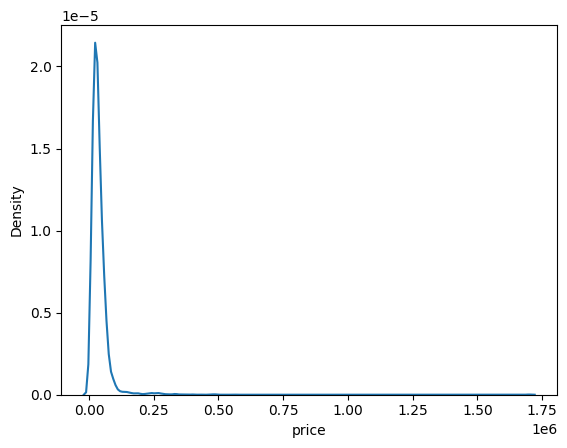

In [82]:
sns.kdeplot(df, x='price') # Shows the curve distribution of the 'price' column

<Axes: xlabel='price'>

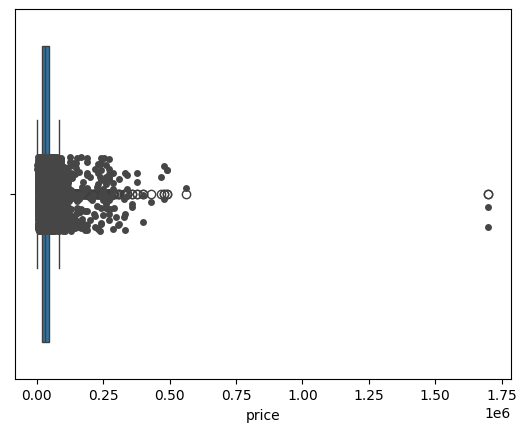

In [83]:
# Creates plots to show the distribution, median, and potential outliers in the 'price' column
sns.boxplot(data=df, x='price')
sns.stripplot(df, x='price', color="#474646")

In [84]:
df.loc[outliers_indices_price] # Shows all rows from the DataFrame that are identified as outliers in the 'price' column

,condition,mileage_mi,price,state,model_year,car_age,manufacturer,fuel_type,drivetrain,transmission,exterior_color,interior_color,accidents_or_damage,1_owner_vehicle
0,New,0,112865,Illinois,2024,1,Lexus,Gasoline,Rear-wheel Drive,Fully Automatic,Black Shades,Black Shades,No accidents/damage,First owner
2,Used,6305,219997,Illinois,2016,9,McLaren,Gasoline,Rear-wheel Drive,Fully Automatic,Gold/ Brown and Orange Shades,Black Shades,had accident/damage,Multiple owners
23,New,0,106615,Illinois,2023,2,Lexus,Gasoline,Rear-wheel Drive,Fully Automatic,Black Shades,Red Shades,No accidents/damage,First owner
65,New,0,115425,Illinois,2024,1,Lexus,Gasoline,Rear-wheel Drive,Fully Automatic,Red Shades,Black Shades,No accidents/damage,First owner
67,Used,852,339800,Illinois,2016,9,McLaren,Gasoline,Rear-wheel Drive,Semi-Automatic / Dual-Clutch,Grey Shades,Black Shades,No accidents/damage,Multiple owners
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7659,Used,498,249895,Illinois,2023,2,Porsche,Gasoline,Rear-wheel Drive,Fully Automatic,Grey Shades,Black Shades,No accidents/damage,Multiple owners
7686,Used,16987,85000,Illinois,2021,4,Cadillac,Gasoline,Four-wheel Drive,Fully Automatic,Others,Grey and Silver Shades,had accident/damage,First owner
7695,Certified Pre-Owned (CPO),7531,275800,Illinois,2021,4,Rolls-Royce,Gasoline,All-wheel Drive,Fully Automatic,Black Shades,Others,No accidents/damage,First owner
7772,Used,9526,109800,Illinois,2023,2,Cadillac,Gasoline,Four-wheel Drive,Tiptronic / Shiftable Automatic,Grey Shades,Black Shades,No accidents/damage,Multiple owners


Note:

When I serached about those outliers, I found that most cars are over/under priced. Some cars are over priced and some cars are under priced which means that they are outliers and it is adviced to remove them

In [85]:
outliers_indices_mi= detect_outliers(df, 0, ['mileage_mi']) # Detects outliers in the 'mileage_mi' column
len(outliers_indices_mi) # Returns the number of detected outlier rows in the 'mileage_mi' column

118

<Axes: xlabel='mileage_mi', ylabel='Density'>

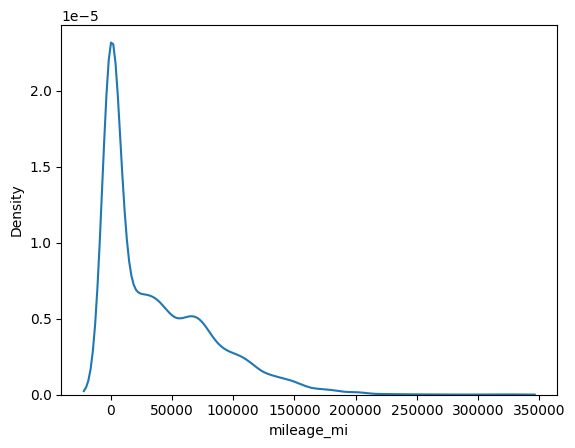

In [86]:
sns.kdeplot(df, x='mileage_mi') # Shows the curve distribution of the 'mileage_mi' column

<Axes: xlabel='mileage_mi'>

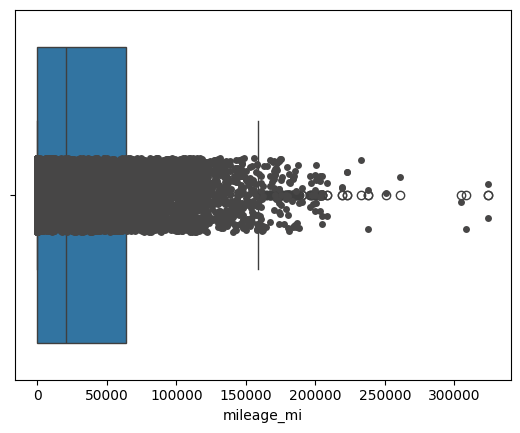

In [87]:
# Creates plots to show the distribution, median, and potential outliers in the 'price' column
sns.boxplot(data=df, x='mileage_mi')
sns.stripplot(df, x='mileage_mi', color="#474646")

In [88]:
df.loc[outliers_indices_mi] # Shows all rows from the DataFrame that were identified as outliers in the 'mileage_mi' column

,condition,mileage_mi,price,state,model_year,car_age,manufacturer,fuel_type,drivetrain,transmission,exterior_color,interior_color,accidents_or_damage,1_owner_vehicle
17,Used,181000,9995,Illinois,2011,14,Ford,Flex Fuel,Rear-wheel Drive,Fully Automatic,Red Shades,Black Shades,had accident/damage,Multiple owners
31,Used,168725,9945,Illinois,2012,13,Toyota,Hybrid,Front-wheel Drive,Fully Automatic,Grey Shades,Grey and Silver Shades,No accidents/damage,First owner
33,Used,173694,4550,Illinois,2007,18,Jeep,Gasoline,Four-wheel Drive,Fully Automatic,Grey Shades,Brown and Beige Shades,had accident/damage,Multiple owners
37,Used,162296,8888,Illinois,2013,12,INFINITI,Gasoline,All-wheel Drive,Fully Automatic,Black Shades,Black Shades,No accidents/damage,First owner
38,Used,167082,7777,Illinois,2008,17,Lexus,Hybrid,All-wheel Drive,Fully Automatic,Red Shades,Brown and Beige Shades,had accident/damage,First owner
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7523,Used,203389,3600,Illinois,2009,16,Toyota,Gasoline,Front-wheel Drive,Fully Automatic,Gold/ Brown and Orange Shades,Grey and Silver Shades,had accident/damage,Multiple owners
7580,Used,171704,9995,Illinois,2011,14,Honda,Gasoline,Front-wheel Drive,Fully Automatic,Black Shades,Brown and Beige Shades,No accidents/damage,Multiple owners
7593,Used,208038,2899,Illinois,2010,15,Lincoln,Gasoline,All-wheel Drive,Fully Automatic,Grey Shades,Black Shades,No accidents/damage,Multiple owners
7739,Used,324349,5888,Illinois,2009,16,INFINITI,Gasoline,All-wheel Drive,Fully Automatic,Black Shades,Black Shades,No accidents/damage,First owner


Findings:

As I searched, I found that some numbers are not logical, plus it is hard to predict if all of those are outliers or not. In this casem it is better to go back to the business and check about those outliers in mileage. Since I am not able to do so, I decided to delete them to be on the save side. Plus the number of outliers here (118 record) are too small compared to the total number of the data (7828). So deleting them will not caues any issue.


### Deleting Outliers

In [89]:
outliers_indices_price= detect_outliers(df, 0, ['price']) # Detects outliers in the 'price' column
len(outliers_indices_price) # Returns the total number of detected outlier rows in the 'price' column

346

In [90]:
outliers_indices_mi= detect_outliers(df, 0, ['mileage_mi']) # Detects outliers in the 'mileage_mi' column
len(outliers_indices_mi) # Returns the total number of detected outlier rows in the 'mileage_mi' column

118

In [91]:
df.drop((outliers_indices_price), inplace= True) # Removes all rows from the DataFrame that are outliers in the 'price' column

In [92]:
df.drop((outliers_indices_mi), inplace= True)

### Checking Outliers again

In [93]:
outliers_indices_price= detect_outliers(df, 0, ['price']) # Detects outliers in the 'price' column
len(outliers_indices_price) # Returns the total number of detected outlier rows in the 'price' column

64

In [94]:
df.loc[outliers_indices_price] # Shows all rows from the DataFrame that are identified as outliers in the 'price' column

,condition,mileage_mi,price,state,model_year,car_age,manufacturer,fuel_type,drivetrain,transmission,exterior_color,interior_color,accidents_or_damage,1_owner_vehicle
60,Used,14826,78800,Illinois,2017,8,BMW,Gasoline,Rear-wheel Drive,Manual Transmission,Grey Shades,Black Shades,No accidents/damage,Multiple owners
391,Used,29170,78850,Illinois,2021,4,BMW,Gasoline,All-wheel Drive,Tiptronic / Shiftable Automatic,Black Shades,Black Shades,No accidents/damage,First owner
669,Used,60970,82499,Illinois,2019,6,Mercedes-Benz,Gasoline,All-wheel Drive,Fully Automatic,Black Shades,Black Shades,No accidents/damage,First owner
695,Used,32450,78900,Illinois,2019,6,Mercedes-Benz,Gasoline,All-wheel Drive,Fully Automatic,Black Shades,Black Shades,had accident/damage,Multiple owners
852,Used,39425,79210,Illinois,2021,4,Cadillac,Gasoline,Four-wheel Drive,Fully Automatic,Grey Shades,Black Shades,had accident/damage,Multiple owners
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7243,Used,14826,78800,Illinois,2017,8,BMW,Gasoline,Rear-wheel Drive,Manual Transmission,Grey Shades,Black Shades,No accidents/damage,Multiple owners
7323,Used,12920,79777,Illinois,2022,3,Lexus,Gasoline,All-wheel Drive,Fully Automatic,Black Shades,Black Shades,No accidents/damage,First owner
7533,Used,1309,78800,Illinois,2016,9,Chevrolet,Gasoline,Rear-wheel Drive,Manual Transmission,White Shades,Black Shades,No accidents/damage,First owner
7586,Certified Pre-Owned (CPO),40154,83294,Illinois,2023,2,Cadillac,Gasoline,Four-wheel Drive,Fully Automatic,Black Shades,Black Shades,No accidents/damage,First owner


Note:

I checked and those prices do not reflect the actual prices in the market. So they have to be deleted to be on the save side

In [95]:
df.drop((outliers_indices_price), inplace= True) # Removes all rows from the DataFrame that are outliers in the 'price' column

In [96]:
outliers_indices_price= detect_outliers(df, 0, ['price']) # Detects outliers in the 'price' column
len(outliers_indices_price) # Returns the total number of detected outlier rows in the 'price' column

15

In [97]:
df.drop((outliers_indices_price), inplace= True) # Removes all rows from the DataFrame that are outliers in the 'price' column

In [98]:
outliers_indices_price= detect_outliers(df, 0, ['price']) # Detects outliers in the 'price' column
len(outliers_indices_price) # Returns the total number of detected outlier rows in the 'price' column

0

In [99]:
outliers_indices_mi= detect_outliers(df, 0, ['mileage_mi']) # Detects outliers in the 'mileage_mi' column
len(outliers_indices_mi) # Returns the total number of detected outlier rows in the 'mileage_mi' column

0

In [100]:
outliers_indices_mi= detect_outliers(df, 0, ['mileage_mi']) # Detects outliers in the 'mileage_mi' column
len(outliers_indices_mi) # Returns the total number of detected outlier rows in the 'mileage_mi' column

0

In [101]:
df.drop((outliers_indices_price), inplace= True) # Removes all rows from the DataFrame that are outliers in the 'price' column

In [102]:
df.drop((outliers_indices_mi), inplace= True) # Removes all rows from the DataFrame that are outliers in the 'mileage_mi' column

In [103]:
outliers_indices_price= detect_outliers(df, 0, ['price']) # Detects outliers in the 'price' column
len(outliers_indices_price) # Returns the total number of detected outlier rows in the 'price' column

0

In [104]:
outliers_indices_mi= detect_outliers(df, 0, ['mileage_mi']) # Detects outliers in the 'mileage_mi' column
len(outliers_indices_mi) # Returns the total number of detected outlier rows in the 'mileage_mi' column

0

In [105]:
df.drop((outliers_indices_price), inplace= True) # Removes all rows from the DataFrame that are outliers in the 'price' column

In [106]:
outliers_indices_price= detect_outliers(df, 0, ['price']) # Detects outliers in the 'price' column
len(outliers_indices_price) # Returns the total number of detected outlier rows in the 'price' column

0

In [107]:
df.drop((outliers_indices_price), inplace= True) # Removes all rows from the DataFrame that are outliers in the 'price' column

In [108]:
outliers_indices_price= detect_outliers(df, 0, ['price']) # Detects outliers in the 'price' column
len(outliers_indices_price) # Returns the total number of detected outlier rows in the 'price' column

0

In [109]:
outliers_indices_mi= detect_outliers(df, 0, ['mileage_mi']) # Detects outliers in the 'mileage_mi' column
len(outliers_indices_mi) # Returns the total number of detected outlier rows in the 'mileage_mi' column

0

# Doing Another Data Understaing for Checkup

In [110]:
df.duplicated().sum() # Counts the total number of duplicate rows

np.int64(2028)

In [111]:
df = df.drop_duplicates() # Removes all duplicate rows

In [112]:
df.duplicated().sum() # Counts the total number of duplicate rows

np.int64(0)

In [113]:
df.reset_index(inplace=True)  # Resets the index of the DataFrame
df.drop('index', axis=1, inplace=True)  # Removes the 'index' column 
df # Showing the DataFrame 

C:\Users\StARS\AppData\Local\Temp\ipykernel_11276\4070966118.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('index', axis=1, inplace=True)  # Removes the 'index' column


,condition,mileage_mi,price,state,model_year,car_age,manufacturer,fuel_type,drivetrain,transmission,exterior_color,interior_color,accidents_or_damage,1_owner_vehicle
0,Used,61110,11295,Illinois,2007,18,Acura,Gasoline,Front-wheel Drive,Fully Automatic,Grey Shades,Others,had accident/damage,First owner
1,Used,65715,23999,Illinois,2016,9,Audi,Gasoline,All-wheel Drive,Fully Automatic,Black Shades,Black Shades,had accident/damage,Multiple owners
2,Used,19830,39799,Illinois,2018,7,BMW,Gasoline,All-wheel Drive,Fully Automatic,Grey Shades,Black Shades,No accidents/damage,First owner
3,Used,52245,22966,Illinois,2019,6,Jeep,Gasoline,Four-wheel Drive,Fully Automatic,Black Shades,Black Shades,had accident/damage,Multiple owners
4,Used,94008,26995,Illinois,2019,6,Cadillac,Gasoline,All-wheel Drive,Fully Automatic,Black Shades,Black Shades,had accident/damage,Multiple owners
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5253,Used,58640,21991,Illinois,2020,5,Nissan,Gasoline,All-wheel Drive,Continuously Variable Transmission (CVT),Grey Shades,Grey and Silver Shades,No accidents/damage,First owner
5254,New,11,45735,Illinois,2024,1,Jeep,Gasoline,Four-wheel Drive,Fully Automatic,Black Shades,Others,No accidents/damage,First owner
5255,Used,40291,41795,Illinois,2021,4,Audi,Gasoline,All-wheel Drive,Fully Automatic,Grey Shades,Black Shades,had accident/damage,First owner
5256,New,11,62405,Illinois,2024,1,Mercedes-Benz,Gasoline,All-wheel Drive,Fully Automatic,Grey Shades,Black Shades,No accidents/damage,First owner


In [114]:
df.isnull().sum()  # Shows the number of missing (NaN) values

condition              0
mileage_mi             0
price                  0
state                  0
model_year             0
car_age                0
manufacturer           0
fuel_type              0
drivetrain             0
transmission           0
exterior_color         0
interior_color         0
accidents_or_damage    0
1_owner_vehicle        0
dtype: int64

In [115]:
df.duplicated().sum() # Counts the total number of duplicate rows

np.int64(0)

### Checking Again for Outliers

In [116]:
outliers_indices_price= detect_outliers(df, 0, ['price']) # Detects outliers in the 'price' column
len(outliers_indices_price) # Returns the total number of detected outlier rows in the 'price' column

1

In [117]:
df.drop((outliers_indices_price), inplace= True) # Removes all rows from the DataFrame that are outliers in the 'price' column

C:\Users\StARS\AppData\Local\Temp\ipykernel_11276\3176697104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop((outliers_indices_price), inplace= True) # Removes all rows from the DataFrame that are outliers in the 'price' column


In [118]:
outliers_indices_price= detect_outliers(df, 0, ['price']) # Detects outliers in the 'price' column
len(outliers_indices_price) # Returns the total number of detected outlier rows in the 'price' column

1

In [119]:
outliers_indices_mi= detect_outliers(df, 0, ['mileage_mi']) # Detects outliers in the 'mileage_mi' column
len(outliers_indices_mi) # Returns the total number of detected outlier rows in the 'mileage_mi' column

16

In [120]:
df.drop((outliers_indices_mi), inplace= True) # Removes all rows from the DataFrame that are outliers in the 'mileage_mi' column

C:\Users\StARS\AppData\Local\Temp\ipykernel_11276\1545162728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop((outliers_indices_mi), inplace= True) # Removes all rows from the DataFrame that are outliers in the 'mileage_mi' column


In [121]:
outliers_indices_mi= detect_outliers(df, 0, ['mileage_mi']) # Detects outliers in the 'mileage_mi' column
len(outliers_indices_mi) # Returns the total number of detected outlier rows in the 'mileage_mi' column

3

In [122]:
df.drop((outliers_indices_mi), inplace= True) # Removes all rows from the DataFrame that are outliers in the 'mileage_mi' column

C:\Users\StARS\AppData\Local\Temp\ipykernel_11276\1545162728.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop((outliers_indices_mi), inplace= True) # Removes all rows from the DataFrame that are outliers in the 'mileage_mi' column


In [123]:
outliers_indices_mi= detect_outliers(df, 0, ['mileage_mi']) # Detects outliers in the 'mileage_mi' column
len(outliers_indices_mi) # Returns the total number of detected outlier rows in the 'mileage_mi' column

1

In [124]:
outliers_indices_price= detect_outliers(df, 0, ['price']) # Detects outliers in the 'price' column
len(outliers_indices_price) # Returns the total number of detected outlier rows in the 'price' column

3

In [125]:
df.drop((outliers_indices_price), inplace= True) # Removes all rows from the DataFrame that are outliers in the 'price' column

C:\Users\StARS\AppData\Local\Temp\ipykernel_11276\3176697104.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop((outliers_indices_price), inplace= True) # Removes all rows from the DataFrame that are outliers in the 'price' column


In [126]:
outliers_indices_price= detect_outliers(df, 0, ['price']) # Detects outliers in the 'price' column
len(outliers_indices_price) # Returns the total number of detected outlier rows in the 'price' column

0

In [127]:
outliers_indices_mi= detect_outliers(df, 0, ['mileage_mi']) # Detects outliers in the 'mileage_mi' column
len(outliers_indices_mi) # Returns the total number of detected outlier rows in the 'mileage_mi' column

0

In [128]:
df # Showing the DataFrame 

,condition,mileage_mi,price,state,model_year,car_age,manufacturer,fuel_type,drivetrain,transmission,exterior_color,interior_color,accidents_or_damage,1_owner_vehicle
0,Used,61110,11295,Illinois,2007,18,Acura,Gasoline,Front-wheel Drive,Fully Automatic,Grey Shades,Others,had accident/damage,First owner
1,Used,65715,23999,Illinois,2016,9,Audi,Gasoline,All-wheel Drive,Fully Automatic,Black Shades,Black Shades,had accident/damage,Multiple owners
2,Used,19830,39799,Illinois,2018,7,BMW,Gasoline,All-wheel Drive,Fully Automatic,Grey Shades,Black Shades,No accidents/damage,First owner
3,Used,52245,22966,Illinois,2019,6,Jeep,Gasoline,Four-wheel Drive,Fully Automatic,Black Shades,Black Shades,had accident/damage,Multiple owners
4,Used,94008,26995,Illinois,2019,6,Cadillac,Gasoline,All-wheel Drive,Fully Automatic,Black Shades,Black Shades,had accident/damage,Multiple owners
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5253,Used,58640,21991,Illinois,2020,5,Nissan,Gasoline,All-wheel Drive,Continuously Variable Transmission (CVT),Grey Shades,Grey and Silver Shades,No accidents/damage,First owner
5254,New,11,45735,Illinois,2024,1,Jeep,Gasoline,Four-wheel Drive,Fully Automatic,Black Shades,Others,No accidents/damage,First owner
5255,Used,40291,41795,Illinois,2021,4,Audi,Gasoline,All-wheel Drive,Fully Automatic,Grey Shades,Black Shades,had accident/damage,First owner
5256,New,11,62405,Illinois,2024,1,Mercedes-Benz,Gasoline,All-wheel Drive,Fully Automatic,Grey Shades,Black Shades,No accidents/damage,First owner


In [129]:
df.reset_index(inplace=True)  # Resets the index of the DataFrame
df.drop('index', axis=1, inplace=True)  # Removes the 'index' column 

C:\Users\StARS\AppData\Local\Temp\ipykernel_11276\3794641498.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop('index', axis=1, inplace=True)  # Removes the 'index' column


In [130]:
df.isnull().sum() # Shows the number of missing (NaN) values in each column

condition              0
mileage_mi             0
price                  0
state                  0
model_year             0
car_age                0
manufacturer           0
fuel_type              0
drivetrain             0
transmission           0
exterior_color         0
interior_color         0
accidents_or_damage    0
1_owner_vehicle        0
dtype: int64

In [131]:
df # Showing the DataFrame 

,condition,mileage_mi,price,state,model_year,car_age,manufacturer,fuel_type,drivetrain,transmission,exterior_color,interior_color,accidents_or_damage,1_owner_vehicle
0,Used,61110,11295,Illinois,2007,18,Acura,Gasoline,Front-wheel Drive,Fully Automatic,Grey Shades,Others,had accident/damage,First owner
1,Used,65715,23999,Illinois,2016,9,Audi,Gasoline,All-wheel Drive,Fully Automatic,Black Shades,Black Shades,had accident/damage,Multiple owners
2,Used,19830,39799,Illinois,2018,7,BMW,Gasoline,All-wheel Drive,Fully Automatic,Grey Shades,Black Shades,No accidents/damage,First owner
3,Used,52245,22966,Illinois,2019,6,Jeep,Gasoline,Four-wheel Drive,Fully Automatic,Black Shades,Black Shades,had accident/damage,Multiple owners
4,Used,94008,26995,Illinois,2019,6,Cadillac,Gasoline,All-wheel Drive,Fully Automatic,Black Shades,Black Shades,had accident/damage,Multiple owners
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5230,Used,58640,21991,Illinois,2020,5,Nissan,Gasoline,All-wheel Drive,Continuously Variable Transmission (CVT),Grey Shades,Grey and Silver Shades,No accidents/damage,First owner
5231,New,11,45735,Illinois,2024,1,Jeep,Gasoline,Four-wheel Drive,Fully Automatic,Black Shades,Others,No accidents/damage,First owner
5232,Used,40291,41795,Illinois,2021,4,Audi,Gasoline,All-wheel Drive,Fully Automatic,Grey Shades,Black Shades,had accident/damage,First owner
5233,New,11,62405,Illinois,2024,1,Mercedes-Benz,Gasoline,All-wheel Drive,Fully Automatic,Grey Shades,Black Shades,No accidents/damage,First owner


In [132]:
df.duplicated().sum() # Counts the total number of duplicate rows

np.int64(0)

# Saving the Cleaned Data to CSV File

In [133]:
df.to_csv('cars_sales_cleaned.csv', index=False) # Saves the cleaned DataFrame to a CSV file named 'cars_sales_cleaned.csv'